#  data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv("academic_and_entrepreneurial_development.csv")
df.head()

,Student_ID,Age,Gender,Major,Year_of_Study,Educational_Background,Socioeconomic_Status,Location,High_School_Type,Cumulative_GPA,...,Startup_Founded,Funding_Secured,Business_Plan_Quality_Score,Competitions_Won,Research_Publications,Employment_in_Entrepreneurial_Roles,Innovative_Skill_Score,Entrepreneurial_Talent_Level,Prototype_Completion,Startup_Success
0,S000001,20,Female,Business,2,Medium,Middle,Urban,Public,1.31,...,No,NaN,71.39,0,4.0,Yes,37.52,Low,Not Completed,Failure
1,S000002,22,Male,Business,2,Medium,Middle,Urban,Public,2.18,...,No,7091.42,59.37,2,0.0,No,50.05,Low,Not Completed,Success
2,S000003,21,Male,Sciences,3,High,Middle,Urban,Public,0.26,...,No,NaN,38.01,0,0.0,NaN,65.56,Medium,Not Completed,Success
3,S000004,20,Male,Engineering,4,High,Low,Rural,Public,0.64,...,No,7455.60,24.38,0,0.0,Yes,44.20,High,Not Completed,Failure
4,S000005,19,Female,Engineering,2,Medium,Low,Urban,Public,0.87,...,No,3184.49,39.17,3,1.0,No,39.63,Low,Not Completed,Failure


In [3]:
print("Dataset Overview:\n")
df.info()


Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214354 entries, 0 to 214353
Data columns (total 49 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Student_ID                              214354 non-null  object 
 1   Age                                     214354 non-null  int64  
 2   Gender                                  214354 non-null  object 
 3   Major                                   214354 non-null  object 
 4   Year_of_Study                           214354 non-null  int64  
 5   Educational_Background                  214354 non-null  object 
 6   Socioeconomic_Status                    214354 non-null  object 
 7   Location                                214354 non-null  object 
 8   High_School_Type                        214354 non-null  object 
 9   Cumulative_GPA                          214354 non-null  float64
 10  Course_Grades            

In [4]:
print("\nSummary Statistics:\n")
df.describe()



Summary Statistics:



,Age,Year_of_Study,Cumulative_GPA,Course_Grades,Attendance,Project_Scores,Applied_Courses_Count,Workshops_Attended,Competitions_Participated,Volunteering_Activities,...,Self_Efficacy_Score,Mentorship_Hours,Institutional_Resources_Used,Faculty_Feedback_Score,Institutional_Support_Score,Funding_Secured,Business_Plan_Quality_Score,Competitions_Won,Research_Publications,Innovative_Skill_Score
count,214354.000000,214354.000000,214354.000000,214354.000000,214354.000000,214354.000000,214354.000000,214354.000000,214354.000000,214354.000000,...,214354.000000,175771.000000,214354.000000,214354.000000,214354.000000,160766.000000,214354.000000,214354.000000,197206.000000,214354.000000
mean,20.100278,2.903505,1.143603,70.105960,80.056058,74.976484,3.103320,1.006359,0.519808,1.018162,...,57.124554,10.015564,42.911401,57.150439,37.536041,4999.736878,42.822917,0.421224,0.372539,42.875196
std,0.887108,0.942126,0.638769,9.785085,11.540885,14.450068,1.136581,1.249484,0.726354,1.046614,...,17.523855,10.031550,17.527401,17.454461,16.095479,5009.686801,17.500908,0.724926,0.869012,17.543482
min,18.000000,1.000000,0.000000,50.000000,60.000000,50.000000,1.000000,0.000000,0.000000,0.000000,...,1.760000,0.000000,0.740000,3.060000,0.540000,0.060000,0.640000,0.000000,0.000000,0.630000
25%,20.000000,2.000000,0.650000,63.290000,70.070000,62.480000,2.000000,0.000000,0.000000,0.000000,...,44.640000,2.890000,29.680000,44.710000,25.412500,1439.045000,29.670000,0.000000,0.000000,29.650000
50%,20.000000,3.000000,1.060000,70.060000,80.070000,74.970000,3.000000,0.000000,0.000000,1.000000,...,57.850000,6.930000,42.170000,57.810000,36.480000,3470.100000,42.130000,0.000000,0.000000,42.150000
75%,21.000000,4.000000,1.560000,76.790000,90.050000,87.460000,4.000000,2.000000,1.000000,2.000000,...,70.320000,13.900000,55.427500,70.280000,48.570000,6911.930000,55.220000,1.000000,0.000000,55.370000
max,22.000000,4.000000,3.760000,100.000000,100.000000,100.000000,5.000000,5.000000,3.000000,4.000000,...,99.190000,150.750000,97.920000,99.350000,95.590000,57666.390000,96.830000,3.000000,4.000000,96.450000


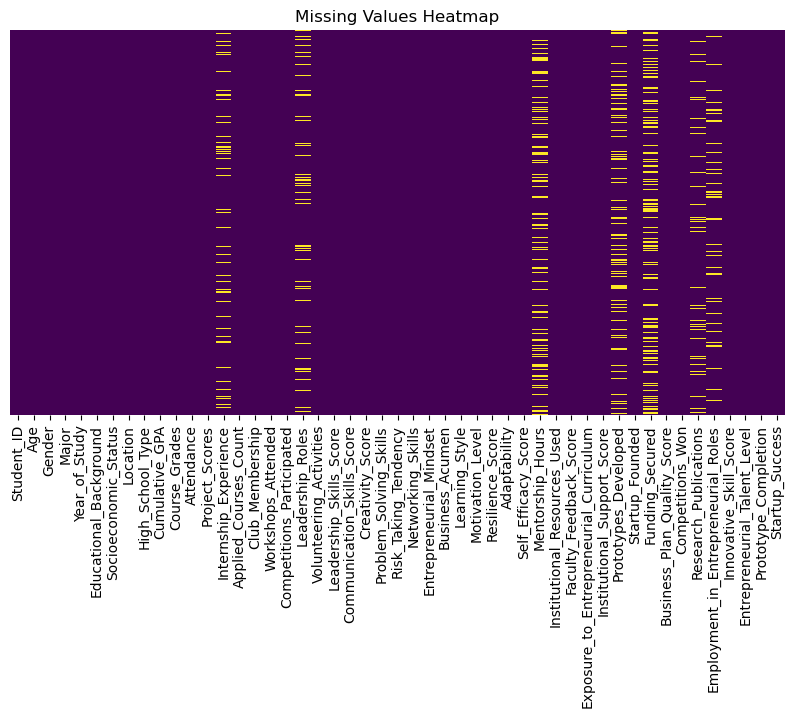

In [5]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

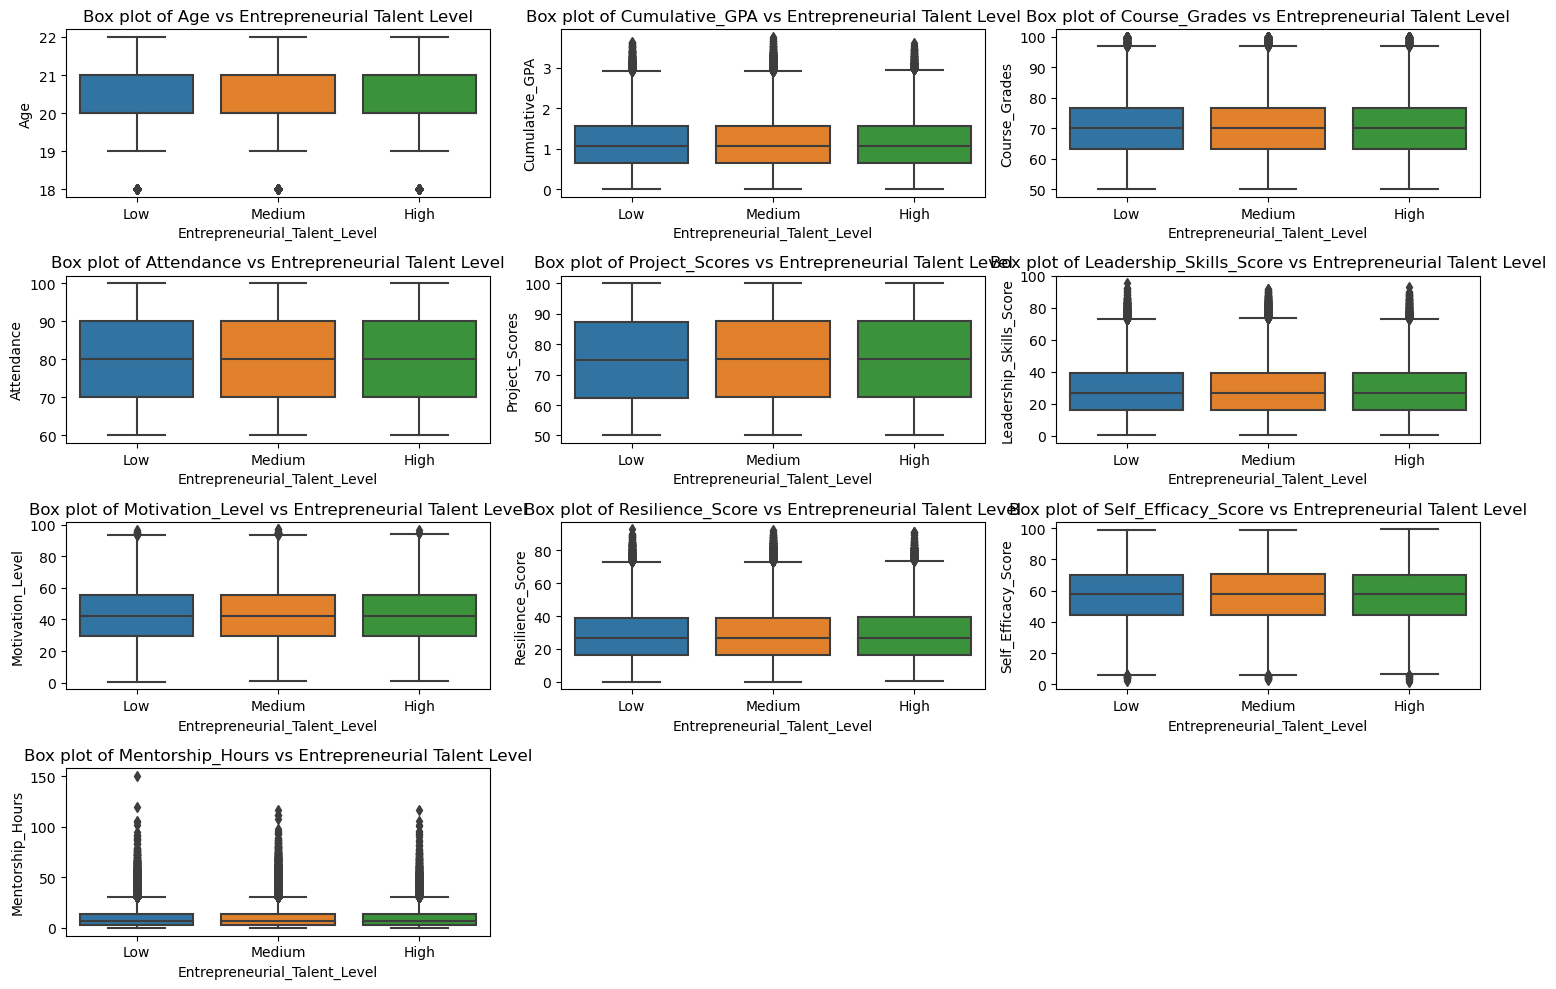

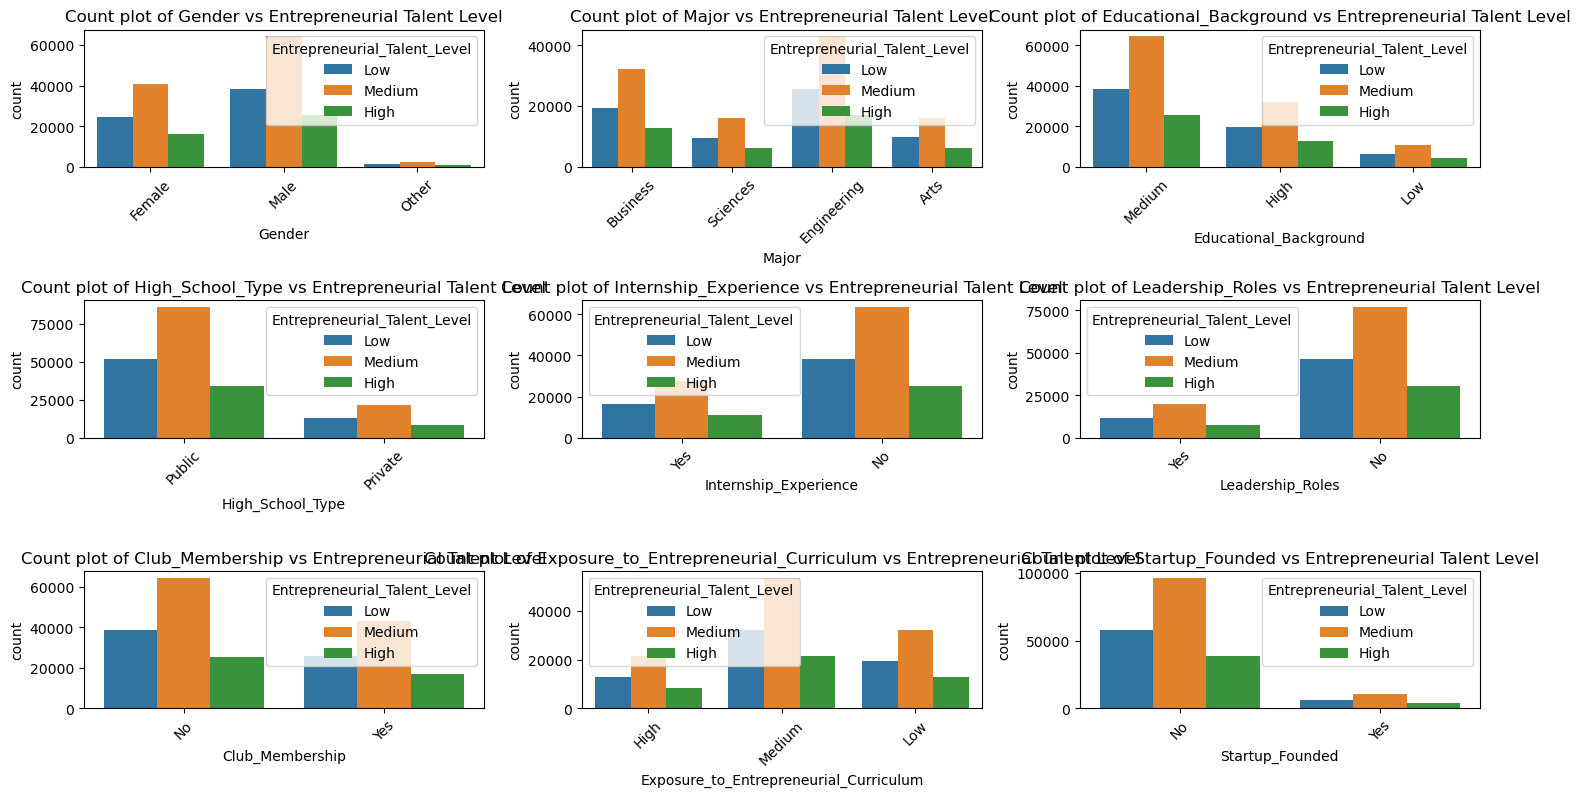

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns from your dataset
numerical_cols = ['Age', 'Cumulative_GPA', 'Course_Grades', 'Attendance', 
                  'Project_Scores', 'Leadership_Skills_Score', 'Motivation_Level', 
                  'Resilience_Score', 'Self_Efficacy_Score', 'Mentorship_Hours']

# List of categorical columns from your dataset
categorical_cols = ['Gender', 'Major', 'Educational_Background', 'High_School_Type', 
                    'Internship_Experience', 'Leadership_Roles', 'Club_Membership', 
                    'Exposure_to_Entrepreneurial_Curriculum', 'Startup_Founded']

# Set up the figure for numerical features
plt.figure(figsize=(15, 10))

# Plot boxplots for numerical columns against Entrepreneurial_Talent_Level (or another suitable target)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  # Adjust based on the number of numerical features
    sns.boxplot(x='Entrepreneurial_Talent_Level', y=col, data=df)
    plt.title(f'Box plot of {col} vs Entrepreneurial Talent Level')

plt.tight_layout()
plt.show()

# Set up the figure for categorical features
plt.figure(figsize=(15, 10))

# Plot count plots for categorical columns against Entrepreneurial_Talent_Level
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)  # Adjust based on the number of categorical features
    sns.countplot(x=col, hue='Entrepreneurial_Talent_Level', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Count plot of {col} vs Entrepreneurial Talent Level')

plt.tight_layout()
plt.show()


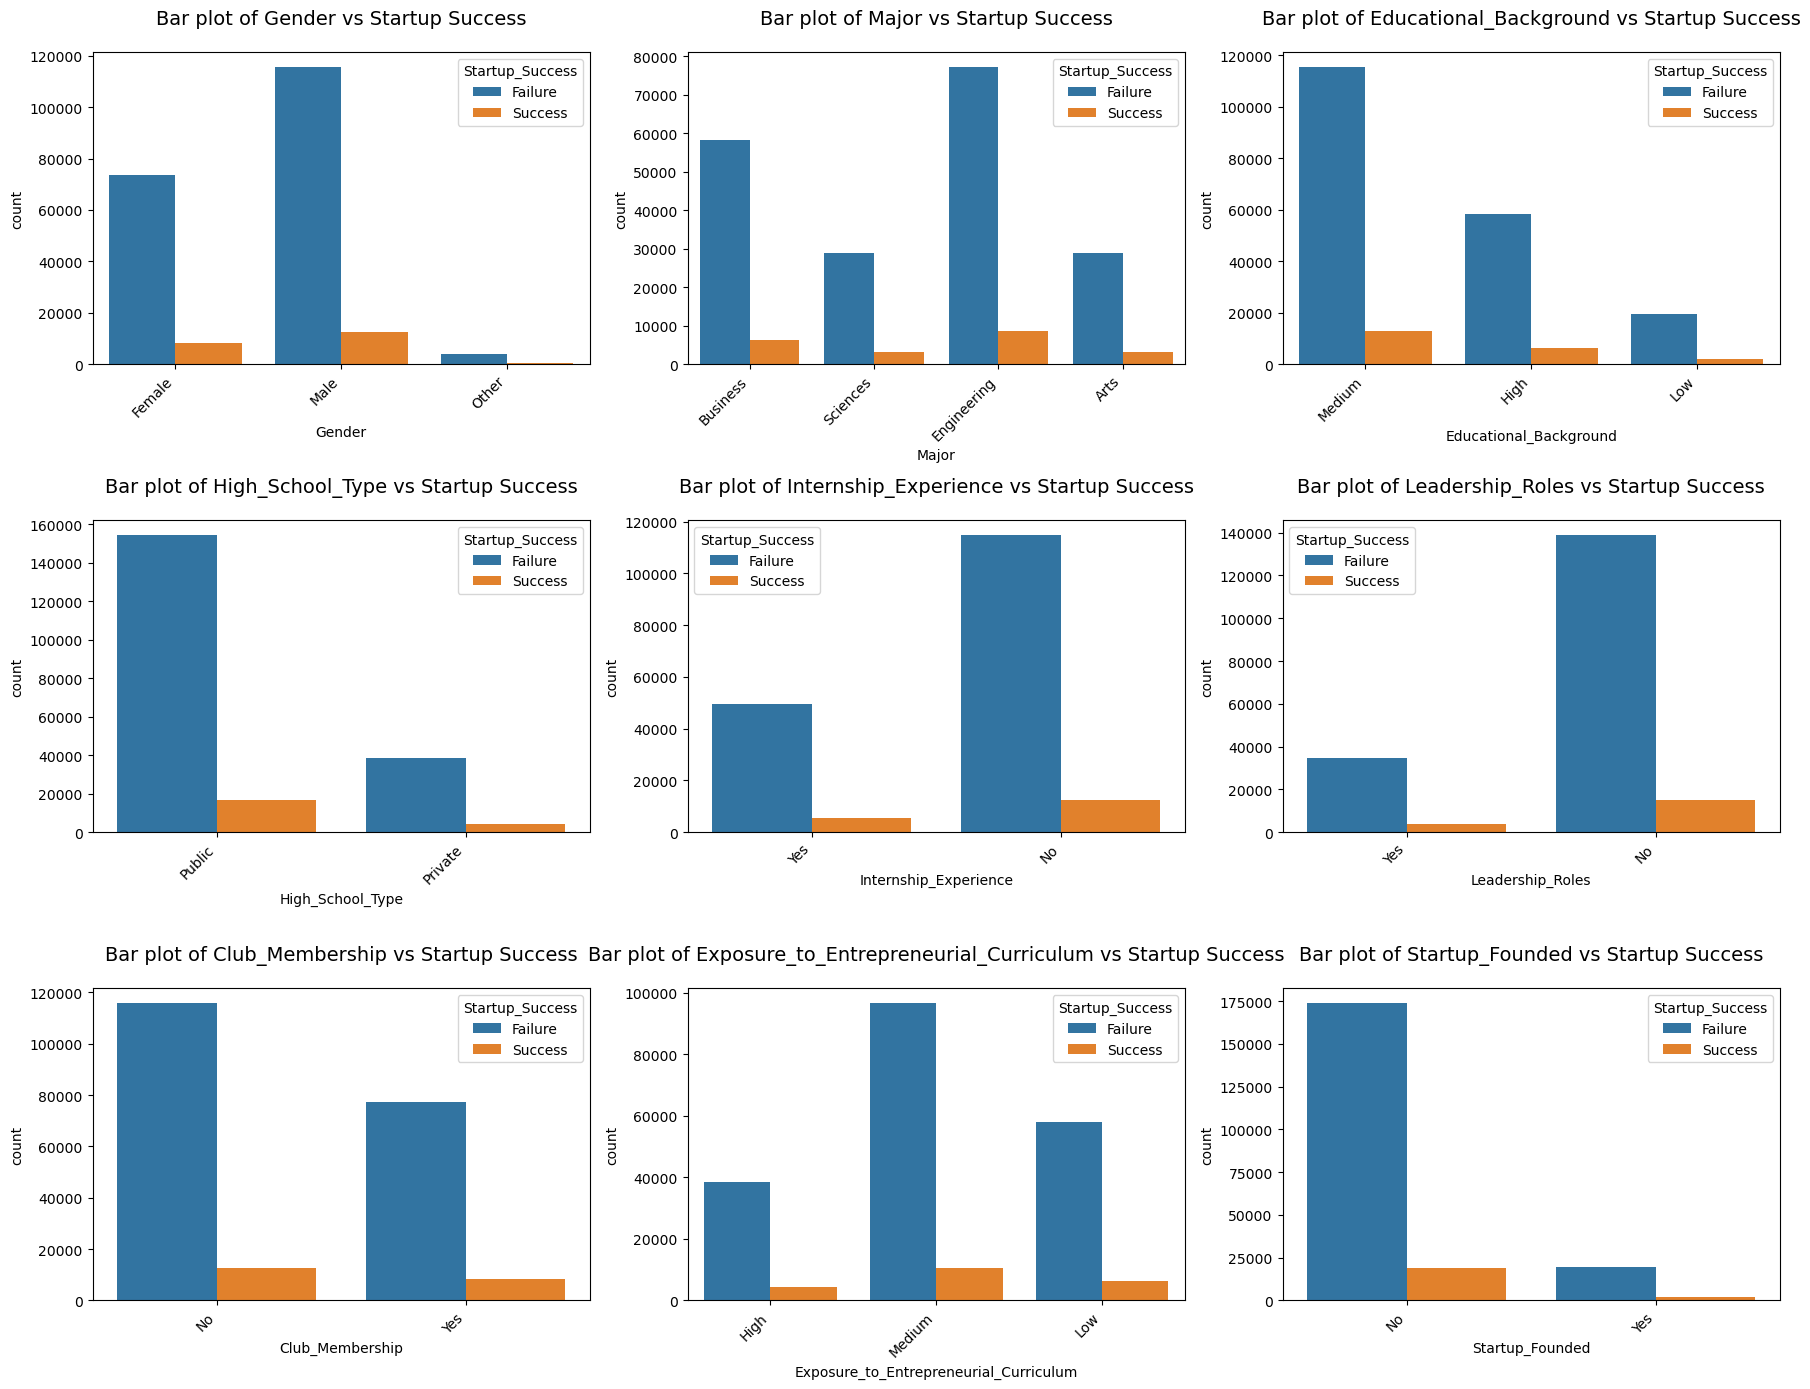

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns relevant to your dataset
categorical_cols = ['Gender', 'Major', 'Educational_Background', 'High_School_Type', 
                    'Internship_Experience', 'Leadership_Roles', 'Club_Membership', 
                    'Exposure_to_Entrepreneurial_Curriculum', 'Startup_Founded']

plt.figure(figsize=(18, 14))  # Increase figure size

# Loop through categorical columns to create count plots
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust the grid layout as needed
    sns.countplot(x=col, hue='Startup_Success', data=df)  # Using 'Startup_Success' as the target
    plt.title(f'Bar plot of {col} vs Startup Success', fontsize=14, pad=20)  # Title adjustments
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Increase spacing between subplots for better visibility
plt.subplots_adjust(hspace=0.8, wspace=0.6)

plt.tight_layout()
plt.show()


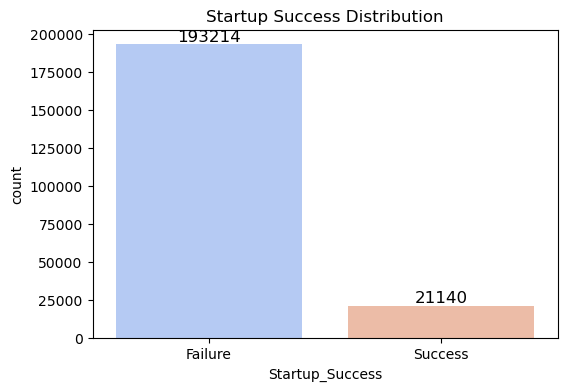

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Startup_Success', data=df, palette="coolwarm")

# Add the count on top of each bar
count_labels = df['Startup_Success'].value_counts()
for i, count in enumerate(count_labels):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)  # Adjust 'count + 2' for positioning

# Set the title and show the plot
plt.title("Startup Success Distribution")
plt.show()


# Data preprocessing

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Handle Missing Values
df = df.copy()  # Ensure original DataFrame isn't modified

# Select only numerical columns (int and float types)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in numerical columns with their median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing values in categorical columns with the mode (most frequent value)
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

print("Missing values handled successfully.")


Missing values handled successfully.


In [10]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in categorical columns with the most frequent value (mode)
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode().iloc[0]))

print("Categorical missing values filled successfully.")


Categorical missing values filled successfully.


In [11]:
df.isnull().sum()

Student_ID                                0
Age                                       0
Gender                                    0
Major                                     0
Year_of_Study                             0
Educational_Background                    0
Socioeconomic_Status                      0
Location                                  0
High_School_Type                          0
Cumulative_GPA                            0
Course_Grades                             0
Attendance                                0
Project_Scores                            0
Internship_Experience                     0
Applied_Courses_Count                     0
Club_Membership                           0
Workshops_Attended                        0
Competitions_Participated                 0
Leadership_Roles                          0
Volunteering_Activities                   0
Leadership_Skills_Score                   0
Communication_Skills_Score                0
Creativity_Score                

# Using Label and one hot encoding 

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Categorical columns for One-Hot Encoding
categorical_columns_onehot = [
    'Gender', 'Major', 'Educational_Background', 'Socioeconomic_Status', 
    'Location', 'High_School_Type', 'Internship_Experience', 'Club_Membership', 
    'Leadership_Roles', 'Learning_Style', 'Exposure_to_Entrepreneurial_Curriculum', 
    'Prototypes_Developed', 'Startup_Founded', 'Employment_in_Entrepreneurial_Roles', 
    'Entrepreneurial_Talent_Level', 'Prototype_Completion'
]

# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_columns_onehot, drop_first=True)

# Categorical columns for Label Encoding (ordered categories or target column)
label_columns = ['Startup_Success']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'Startup_Success' (Target column) or any other ordered categories
df[label_columns] = df[label_columns].apply(label_encoder.fit_transform)

# Check the first few rows to ensure encoding is done
print(df.head())


  Student_ID  Age  Year_of_Study  Cumulative_GPA  Course_Grades  Attendance  \
0    S000001   20              2            1.31          69.42       73.42   
1    S000002   22              2            2.18          56.33       84.99   
2    S000003   21              3            0.26          69.65       76.98   
3    S000004   20              4            0.64          88.31       72.35   
4    S000005   19              2            0.87          71.72       98.07   

   Project_Scores  Applied_Courses_Count  Workshops_Attended  \
0           95.30                      2                   1   
1           68.26                      4                   1   
2           85.88                      4                   0   
3           81.60                      3                   0   
4           75.65                      4                   2   

   Competitions_Participated  ...  Learning_Style_Kinesthetic  \
0                          0  ...                           0   
1         

In [13]:
# Dropping the 'Student_ID' column
df.drop(columns=['Student_ID'], inplace=True)


In [14]:
df.head()

,Age,Year_of_Study,Cumulative_GPA,Course_Grades,Attendance,Project_Scores,Applied_Courses_Count,Workshops_Attended,Competitions_Participated,Volunteering_Activities,...,Learning_Style_Kinesthetic,Learning_Style_Visual,Exposure_to_Entrepreneurial_Curriculum_Low,Exposure_to_Entrepreneurial_Curriculum_Medium,Prototypes_Developed_Yes,Startup_Founded_Yes,Employment_in_Entrepreneurial_Roles_Yes,Entrepreneurial_Talent_Level_Low,Entrepreneurial_Talent_Level_Medium,Prototype_Completion_Not Completed
0,20,2,1.31,69.42,73.42,95.30,2,1,0,1,...,0,1,0,0,0,0,1,1,0,1
1,22,2,2.18,56.33,84.99,68.26,4,1,3,1,...,0,0,0,1,0,0,0,1,0,1
2,21,3,0.26,69.65,76.98,85.88,4,0,1,1,...,0,1,0,1,0,0,0,0,1,1
3,20,4,0.64,88.31,72.35,81.60,3,0,1,0,...,0,1,0,1,1,0,1,0,0,1
4,19,2,0.87,71.72,98.07,75.65,4,2,0,4,...,0,1,0,1,1,0,0,1,0,1


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Features (X) and Target (y)
X = df.drop(columns=['Startup_Success'])
y = df['Startup_Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214354 entries, 0 to 214353
Data columns (total 56 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Age                                            214354 non-null  int64  
 1   Year_of_Study                                  214354 non-null  int64  
 2   Cumulative_GPA                                 214354 non-null  float64
 3   Course_Grades                                  214354 non-null  float64
 4   Attendance                                     214354 non-null  float64
 5   Project_Scores                                 214354 non-null  float64
 6   Applied_Courses_Count                          214354 non-null  int64  
 7   Workshops_Attended                             214354 non-null  int64  
 8   Competitions_Participated                      214354 non-null  int64  
 9   Volunteering_Activities              

In [17]:
df.head()

,Age,Year_of_Study,Cumulative_GPA,Course_Grades,Attendance,Project_Scores,Applied_Courses_Count,Workshops_Attended,Competitions_Participated,Volunteering_Activities,...,Learning_Style_Kinesthetic,Learning_Style_Visual,Exposure_to_Entrepreneurial_Curriculum_Low,Exposure_to_Entrepreneurial_Curriculum_Medium,Prototypes_Developed_Yes,Startup_Founded_Yes,Employment_in_Entrepreneurial_Roles_Yes,Entrepreneurial_Talent_Level_Low,Entrepreneurial_Talent_Level_Medium,Prototype_Completion_Not Completed
0,20,2,1.31,69.42,73.42,95.30,2,1,0,1,...,0,1,0,0,0,0,1,1,0,1
1,22,2,2.18,56.33,84.99,68.26,4,1,3,1,...,0,0,0,1,0,0,0,1,0,1
2,21,3,0.26,69.65,76.98,85.88,4,0,1,1,...,0,1,0,1,0,0,0,0,1,1
3,20,4,0.64,88.31,72.35,81.60,3,0,1,0,...,0,1,0,1,1,0,1,0,0,1
4,19,2,0.87,71.72,98.07,75.65,4,2,0,4,...,0,1,0,1,1,0,0,1,0,1


In [18]:
def logistic_function(x):
    """Compute the logistic function in a vectorized way."""
    x = np.clip(x, -500, 500)  # Prevent overflow
    return 1 / (1 + np.exp(-x))

def log_loss(y_true, y_pred):
    """Compute log loss in a fully vectorized manner."""
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def costfunction_logreg(X, y, w, b):
    """Compute the cost function using vectorized operations."""
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    return log_loss(y, y_pred)  # More efficient computation

def compute_gradient(X, y, w, b):
    """Compute gradients in a fully vectorized manner."""
    m = X.shape[0]
    y_pred = logistic_function(np.dot(X, w) + b)
    
    grad_w = np.dot(X.T, (y_pred - y)) / m
    grad_b = np.mean(y_pred - y)  # Mean instead of dot product with ones
    
    return grad_w, grad_b

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False):
    """Optimize parameters using vectorized gradient descent."""
    cost_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        
        # Simultaneous weight update
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost every 10 iterations for efficiency
        if i % 10 == 0:
            cost = costfunction_logreg(X, y, w, b)
            cost_history.append(cost)
            if show_cost:
                print(f"Iteration {i}: Cost = {cost:.6f}, Gradient Norm = {np.linalg.norm(grad_w):.4f}")

    return w, b, cost_history

def prediction(X, w, b, threshold=0.5):
    """Predict class labels using optimized logistic regression."""
    return (logistic_function(np.dot(X, w) + b) >= threshold).astype(int)


In [19]:
# Evaluation Function: Computes confusion matrix, precision, recall, and F1-score
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0)) 
    FP =np.sum((y_true == 0) & (y_pred == 1))# False Positives
    FN =np.sum((y_true == 1) & (y_pred == 0)) # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    # Return metrics as a dictionary
    return confusion_matrix, precision, recall, f1_score

In [33]:
np.random.seed(42)
w = np.random.randn(X_train.shape[1]) * 0.01  # Small initial weights
b = 0.0
alpha = alpha = 0.001 
n_iter = 100


In [34]:
print("\nTraining Optimized Logistic Regression Model:")
w, b, cost_history = gradient_descent(X_train_resampled, y_train_resampled, w, b, alpha, n_iter, show_cost=True)


Training Optimized Logistic Regression Model:
Iteration 0: Cost = 0.690217, Gradient Norm = 0.5492
Iteration 10: Cost = 0.687219, Gradient Norm = 0.5462
Iteration 20: Cost = 0.684256, Gradient Norm = 0.5431
Iteration 30: Cost = 0.681324, Gradient Norm = 0.5401
Iteration 40: Cost = 0.678425, Gradient Norm = 0.5371
Iteration 50: Cost = 0.675558, Gradient Norm = 0.5342
Iteration 60: Cost = 0.672723, Gradient Norm = 0.5312
Iteration 70: Cost = 0.669919, Gradient Norm = 0.5283
Iteration 80: Cost = 0.667146, Gradient Norm = 0.5254
Iteration 90: Cost = 0.664403, Gradient Norm = 0.5225


In [35]:

# Test model
y_train_pred = prediction(X_train_resampled, w, b)
y_test_pred = prediction(X_test, w, b)



In [36]:
 # Evaluate train and test performance
train_cost = costfunction_logreg(X_train_resampled, y_train_resampled, w, b)
test_cost = costfunction_logreg(X_test, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.6620
Test Loss (Cost): 0.6685


In [37]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
# pd.crosstab(y_test,y_pred)


Test Accuracy: 70.43%

Confusion Matrix:
[[29151  9492]
 [ 3183  1045]]
Precision: 0.10
Recall: 0.25
F1-Score: 0.14


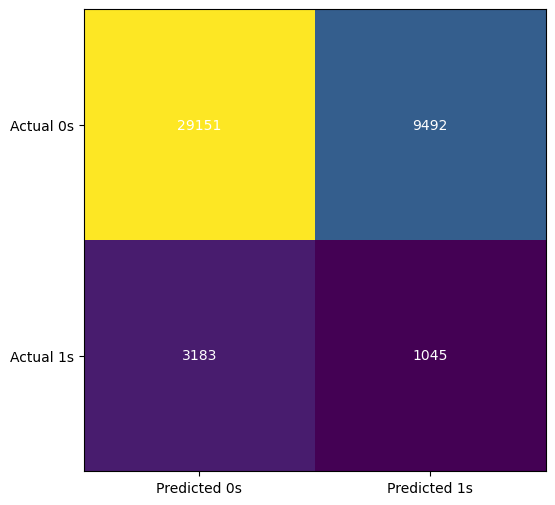

In [38]:
# Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()

# Build Primary Models

## Logistic using sklearn

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [40]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  

# Train the model
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%')
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy: 82.30%
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     38643
           1       0.09      0.09      0.09      4228

    accuracy                           0.82     42871
   macro avg       0.50      0.50      0.50     42871
weighted avg       0.82      0.82      0.82     42871

Confusion Matrix for Logistic Regression:
 [[34889  3754]
 [ 3834   394]]


In [41]:
#gives more accuracy while using sklearn

## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Initialize the KNN model with k=3 and distance-based weighting
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Train the model
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%')
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix for KNN:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 68.07%
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80     38643
           1       0.10      0.27      0.14      4228

    accuracy                           0.68     42871
   macro avg       0.50      0.50      0.47     42871
weighted avg       0.82      0.68      0.74     42871

Confusion Matrix for KNN:
 [[28062 10581]
 [ 3107  1121]]


Here Knn performance is lower than the Logistic

## Hyper parameter tuning

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Optimized hyperparameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.1, 1, 10],  # Reduced range
    'solver': ['liblinear'],  # Removed slow solver
    'class_weight': ['balanced']  # Only keeping one
}

# Optimized hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7],  # Removed unnecessary values
    'weights': ['distance'],  # Removed uniform
    'metric': ['euclidean']  # Single metric
}

# Use GridSearchCV (since the search space is small)
logreg_search = GridSearchCV(
    LogisticRegression(max_iter=1000), logreg_param_grid, 
    cv=3, scoring='f1_macro', n_jobs=-1
)
logreg_search.fit(X_train_resampled, y_train_resampled)

knn_search = GridSearchCV(
    KNeighborsClassifier(), knn_param_grid, 
    cv=3, scoring='f1_macro', n_jobs=-1
)
knn_search.fit(X_train_resampled, y_train_resampled)

# Print best hyperparameters
print(" Best hyperparameters for Logistic Regression:", logreg_search.best_params_)
print(" Best hyperparameters for KNN:", knn_search.best_params_)


 Best hyperparameters for Logistic Regression: {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
 Best hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


## Feature selection 

In [45]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define number of top features to select
k = 20  # You can adjust based on feature importance analysis

# Apply feature selection on training data
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

# Get selected feature indices
selected_features = selector.get_support(indices=True)

# Print selected feature indices
print("Selected feature indices:", selected_features)


Selected feature indices: [ 0  8 31 33 34 35 37 38 39 40 42 43 44 46 47 48 49 51 52 53]


 # Final model

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Train final Logistic Regression model with best hyperparameters
best_logreg_params = logreg_search.best_params_.copy()  # Use logreg_search instead of logreg_grid_search
best_logreg_params['class_weight'] = 'balanced'  # Add or modify the class_weight parameter
best_logreg = LogisticRegression(**best_logreg_params)
best_logreg.fit(X_train_selected, y_train_resampled)

# Train final KNN model with best hyperparameters
best_knn = KNeighborsClassifier(**knn_search.best_params_, algorithm='auto')  # No need for weights='distance' here
best_knn.fit(X_train_selected, y_train_resampled)

# Predictions on test set
y_pred_logreg = best_logreg.predict(X_test_selected)
y_pred_knn = best_knn.predict(X_test_selected)

# Evaluate Logistic Regression
print("\nFinal Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

# Evaluate KNN
print("\nFinal KNN Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



Final Logistic Regression Model Performance:
Accuracy: 81.05%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     38643
           1       0.10      0.11      0.10      4228

    accuracy                           0.81     42871
   macro avg       0.50      0.50      0.50     42871
weighted avg       0.82      0.81      0.82     42871

Confusion Matrix:
 [[34282  4361]
 [ 3763   465]]

Final KNN Model Performance:
Accuracy: 82.81%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     38643
           1       0.09      0.08      0.09      4228

    accuracy                           0.83     42871
   macro avg       0.50      0.50      0.50     42871
weighted avg       0.82      0.83      0.82     42871

Confusion Matrix:
 [[35143  3500]
 [ 3869   359]]


### 7. Conclusion

#### 1. **Model Performance:**
Both **Logistic Regression** (81.05% accuracy) and **KNN** (82.81% accuracy) performed reasonably well overall. However, both models struggled with classifying the minority class (successful startups), as seen in their low recall (~0.10 for Logistic Regression, ~0.08 for KNN) for class 1. This issue highlights the class imbalance in the dataset.

#### 2. **Impact of Methods:**
   - **Cross-Validation**: **GridSearchCV** helped tune the models and ensured reliable performance by reducing overfitting.
   - **Feature Selection**: **SelectKBest** reduced dimensionality, but did not significantly improve performance in dealing with class imbalance.
   - **Class Weight Adjustment**: **class_weight='balanced'** helped address the imbalance to some extent but did not fully resolve the issue of poor recall for class 1.

#### 3. **Insights and Future Directions:**
   - **Insights**: Class imbalance significantly impacted model performance, especially recall for the minority class.
   - **Future Directions**:
     - **Resampling**: Explore further use of **SMOTE** or **ADASYN** for better handling of class imbalance.
     - **Ensemble Methods**: Try models like **Random Forests** or **XGBoost**, which can handle imbalanced data better.
     - **Threshold Tuning**: Adjust classification thresholds to improve recall for the minority class.
     - **Advanced Models**: Consider using **neural networks** to capture more complex patterns in imbalanced datasets.

In conclusion, while both models provided valuable insights, further improvements are needed, especially in handling class imbalance, to predict startup success more accurately.
